### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Calcular el total de Ingreso de ventas (Precio) para cada tienda
total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()

Total de Ingreso de ventas para la tienda 1: 1150880400.0
Total de Ingreso de ventas para la tienda 2: 1116343500.0
Total de Ingreso de ventas para la tienda 3: 1098019600.0
Total de Ingreso de ventas para la tienda 4: 1038375700.0


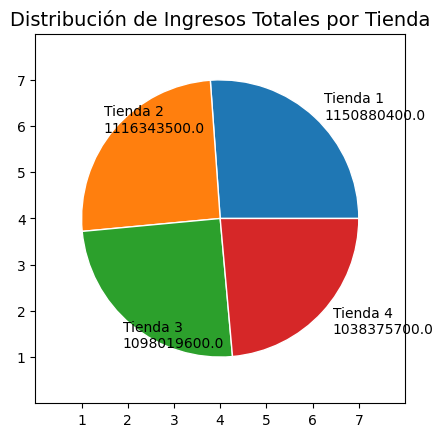

In [27]:
# Muestra el total de Ingreso de Ventas
print("Total de Ingreso de ventas para la tienda 1:", total_tienda1)
print("Total de Ingreso de ventas para la tienda 2:", total_tienda2)
print("Total de Ingreso de ventas para la tienda 3:", total_tienda3)
print("Total de Ingreso de ventas para la tienda 4:", total_tienda4)
# plot
import matplotlib.pyplot as plt
import numpy as np
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, naranja, verde, rojo
fig, ax = plt.subplots()

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
Totales = [total_tienda1, total_tienda2, total_tienda3, total_tienda4]
labels = [f"{nombre}\n{total}" for nombre, total in zip(nombres_tiendas, Totales)]
#plt.pie(Totales, labels=labels, colors=colores, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax.pie(Totales, labels=labels, colors=colores, radius=3, center=(4, 4),
wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
plt.title('Distribución de Ingresos Totales por Tienda', fontsize=14)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

# 2. Ventas por categoría

tiendas 1     Categoría del Producto  Cantidad
0  Artículos para el hogar       171
1     Deportes y diversión       284
2        Electrodomésticos       312
3             Electrónicos       448
4   Instrumentos musicales       182
5                 Juguetes       324
6                   Libros       173
7                  Muebles       465

La categoría más vendida en la tienda 1 es: Muebles con 465 ventas.

tiendas 2     Categoría del Producto  Cantidad
0  Artículos para el hogar       181
1     Deportes y diversión       275
2        Electrodomésticos       305
3             Electrónicos       422
4   Instrumentos musicales       224
5                 Juguetes       313
6                   Libros       197
7                  Muebles       442

La categoría más vendida en la tienda 2 es: Muebles con 442 ventas.

tiendas 3     Categoría del Producto  Cantidad
0  Artículos para el hogar       177
1     Deportes y diversión       277
2        Electrodomésticos       278
3             El

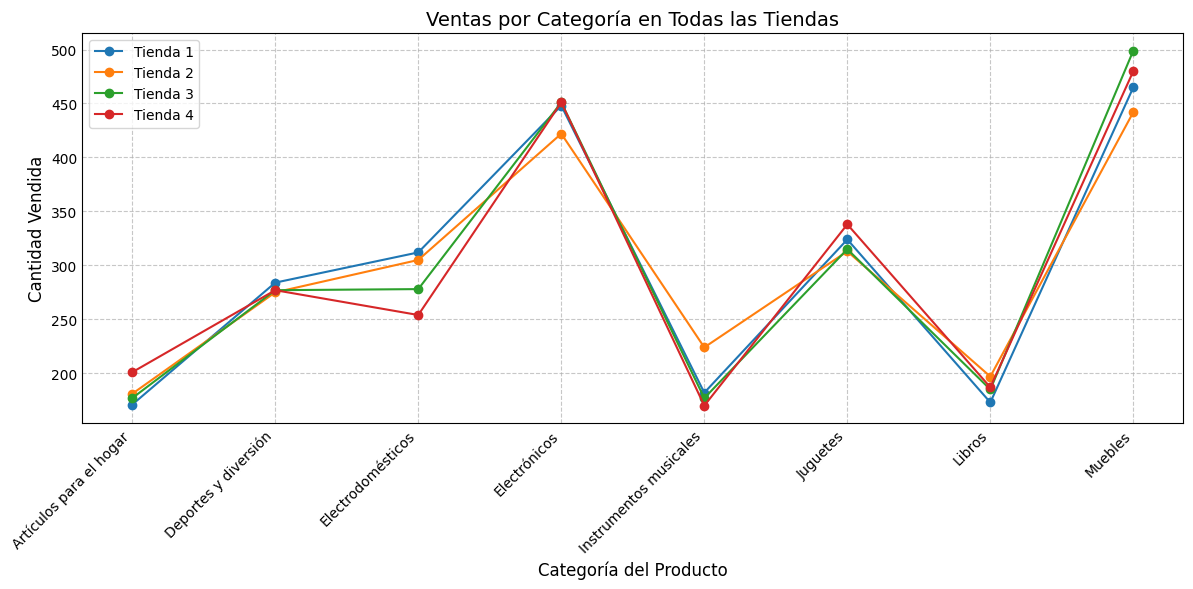

In [47]:
#Categorias mas vendidas Lista de tiendas categoria del producto
contador =1
tiendas = [tienda, tienda2, tienda3, tienda4]
nombre_tienda = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
# Preparar datos para el gráfico de líneas
plt.figure(figsize=(12, 6))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, naranja, verde, rojo
categorias_totales = []
cantidades_totales = []
for t in tiendas:
  Ventas_por_categoria = t.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
  print(f'tiendas {contador} {Ventas_por_categoria}\n')
  if Ventas_por_categoria is not None:
    cantidad_mas_vendida = Ventas_por_categoria.loc[Ventas_por_categoria['Cantidad'].idxmax()]
    categorias_totales.append(Ventas_por_categoria['Categoría del Producto'])
    cantidades_totales.append(Ventas_por_categoria['Cantidad'])
    print(f"La categoría más vendida en la tienda {contador} es: {cantidad_mas_vendida['Categoría del Producto']} con {cantidad_mas_vendida['Cantidad']} ventas.\n")
  contador +=1
 # Graficar
for i in range(len(tiendas)):
    plt.plot(categorias_totales[i], cantidades_totales[i], marker='o', label=nombre_tienda[i],  color=color[i])
# Configurar el gráfico
plt.title('Ventas por Categoría en Todas las Tiendas', fontsize=14)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'ventas_por_categoria.png')
plt.tight_layout()

#plt.xlabel('Categoría del Producto')
#plt.ylabel('Cantidad de Ventas')
#plt.title('Categorías más Vendidas por Tienda')
#plt.legend()
plt.show()

# 3. Calificación promedio de la tienda


La calificación promedio de la tienda 1 es: 3.976685036032217
La calificación promedio de la tienda 2 es: 4.037303942348453
La calificación promedio de la tienda 3 es: 4.048325561678677
La calificación promedio de la tienda 4 es: 3.9957591178965224


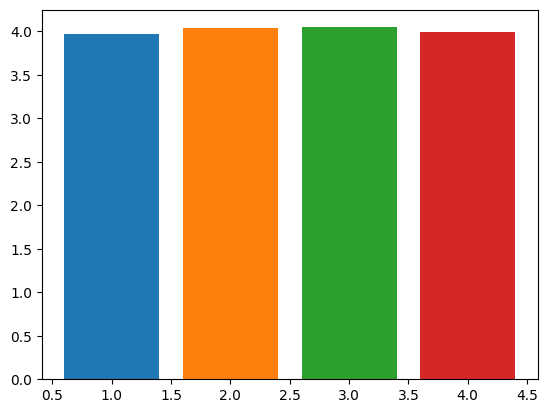

In [24]:
from matplotlib import pyplot as plt
contador =1
for t in tiendas:
  calificacion_promedio = t['Calificación'].mean()
  plt.bar(x= contador, height=calificacion_promedio)
  print(f"La calificación promedio de la tienda {contador} es: {calificacion_promedio}")
  contador +=1
plt.show()


# 4. Productos más y menos vendidos

In [17]:
contador =1
for t in tiendas:
  max_cantidad_vendida_por_Tienda = t.groupby('Producto').size().reset_index(name='Cantidad').max()
  min_cantidad_vendida = t.groupby('Producto').size().reset_index(name='Cantidad').min()
  print(f"Productos más vendidos por tienda {contador}:")
  print(max_cantidad_vendida_por_Tienda)
  print(f"\nProductos menos vendidos por tienda {contador}:")
  print(min_cantidad_vendida)
  contador +=1

Productos más vendidos por tienda 1:
Producto    Vaso térmico
Cantidad              60
dtype: object

Productos menos vendidos por tienda 1:
Producto    Ajedrez de madera
Cantidad                   33
dtype: object
Productos más vendidos por tienda 2:
Producto    Vaso térmico
Cantidad              65
dtype: object

Productos menos vendidos por tienda 2:
Producto    Ajedrez de madera
Cantidad                   32
dtype: object
Productos más vendidos por tienda 3:
Producto    Vaso térmico
Cantidad              57
dtype: object

Productos menos vendidos por tienda 3:
Producto    Ajedrez de madera
Cantidad                   35
dtype: object
Productos más vendidos por tienda 4:
Producto    Vaso térmico
Cantidad              62
dtype: object

Productos menos vendidos por tienda 4:
Producto    Ajedrez de madera
Cantidad                   33
dtype: object


# 5. Envío promedio por tienda

In [22]:
contador =1
for t in tiendas:
  envio_promedio = t['Costo de envío'].mean()
  print(f"El envío promedio de la tienda {contador} es: {envio_promedio}")
  contador +=1

El envío promedio de la tienda 1 es: 26018.60958033065
El envío promedio de la tienda 2 es: 25216.235693090293
El envío promedio de la tienda 3 es: 24805.680373039424
El envío promedio de la tienda 4 es: 23459.457167090754
